In [ ]:
'Part 1 Retreiving LinkedIn Data'

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# Retrieving Linked In data from csv
df_linkedin = pd.read_csv('/content/drive/Shareddrives/STA 141B Final Project /1/linkedIn_data.csv')
# Renaming columns
df_linkedin.columns = ['Job Title', 'Company Name', 'Job Location', 'Salary Information', 'mode_of_work']
# Gives first 5 rows of data
df_linkedin.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Job Title,Company Name,Job Location,Salary Information,mode_of_work
0,Enterprise Account Executive,Confluent,"Michigan, United States",$131.4K/yr - $154.4K/yr,Remote
1,Professional Services Consultant - Networking/...,LogicalisUS,"Corona, CA",$130K/yr - $150K/yr,On-site
2,Executive Partner - CTO Advisory - Infrastruct...,Gartner,"Texas, United States",$164.8K/yr - $192K/yr · 401(k),Remote
3,"Escalation Engineer (EM), Escalation & Event M...",Amazon Web Services (AWS),"Seattle, WA",$86K/yr - $185K/yr,On-site
4,Workday AMS Integrations Consultant,Deloitte,"St Louis, MO",$97.9K/yr - $163.1K/yr,Hybrid


In [ ]:
'Part 2 - Retreiving Indeed Data'
# Retrieve Indeed data from csv
df_indeed = pd.read_csv('/content/drive/Shareddrives/STA 141B Final Project /1/job_listings.csv')
# Gives first 5 rows of data
df_indeed.head()

,Company Name,Job Location,Job Title,Salary Information
0,University of Washington,"Seattle, WA",BUSINESS ANALYST,None provided
1,Target,"Minneapolis, MN 55445",Engineer - Microsoft 365 Admin,"$67,800 - $122,000 a year"
2,Citadel Federal Credit Union,"Exton, PA 19341",Card Portfolios Product Manager,None provided
3,Sanametrix,Remote,Web Developer,"$120,000 - $130,000 a year"
4,SureView Systems,"Remote in Menlo Park, CA",Job Location: Remote (US Based),"$95,000 - $125,000 a year"


In [ ]:
'Part 3 - Organizing Indeed Data'

# Convert 'Job Location' to string first (handling NaN values as 'nan')
df_indeed['Job Location'] = df_indeed['Job Location'].astype(str)
# Add column mode_of_work to match LinkedIn, if Job Location is Remote then mode_of_work is remote if Job Location is not Remote then On-Site
df_indeed['mode_of_work'] = df_indeed['Job Location'].apply(lambda x: 'Remote' if 'remote' in x.lower() else 'On-site')

# Display the DataFrame to verify the new column
df_indeed.head()

,Company Name,Job Location,Job Title,Salary Information,mode_of_work
0,University of Washington,"Seattle, WA",BUSINESS ANALYST,None provided,On-site
1,Target,"Minneapolis, MN 55445",Engineer - Microsoft 365 Admin,"$67,800 - $122,000 a year",On-site
2,Citadel Federal Credit Union,"Exton, PA 19341",Card Portfolios Product Manager,None provided,On-site
3,Sanametrix,Remote,Web Developer,"$120,000 - $130,000 a year",Remote
4,SureView Systems,"Remote in Menlo Park, CA",Job Location: Remote (US Based),"$95,000 - $125,000 a year",Remote


In [ ]:

# Get the list of column names
columns = df_indeed.columns.tolist()
# Rearrange the columns
new_order = [columns[2]] + columns[:2] + columns[3:]
# Reorder the DataFrame
df_indeed = df_indeed[new_order]
#only run once!
df_indeed.head()

,Job Title,Company Name,Job Location,Salary Information,mode_of_work
0,BUSINESS ANALYST,University of Washington,"Seattle, WA",None provided,On-site
1,Engineer - Microsoft 365 Admin,Target,"Minneapolis, MN 55445","$67,800 - $122,000 a year",On-site
2,Card Portfolios Product Manager,Citadel Federal Credit Union,"Exton, PA 19341",None provided,On-site
3,Web Developer,Sanametrix,Remote,"$120,000 - $130,000 a year",Remote
4,Job Location: Remote (US Based),SureView Systems,"Remote in Menlo Park, CA","$95,000 - $125,000 a year",Remote


In [ ]:
'Part 4 - Merging Both Data Sets'

# Merge LinkedIn and Indeed data sets
merged_df = pd.concat([df_linkedin, df_indeed], ignore_index=True)
merged_df.head()

,Job Title,Company Name,Job Location,Salary Information,mode_of_work
0,Enterprise Account Executive,Confluent,"Michigan, United States",$131.4K/yr - $154.4K/yr,Remote
1,Professional Services Consultant - Networking/...,LogicalisUS,"Corona, CA",$130K/yr - $150K/yr,On-site
2,Executive Partner - CTO Advisory - Infrastruct...,Gartner,"Texas, United States",$164.8K/yr - $192K/yr · 401(k),Remote
3,"Escalation Engineer (EM), Escalation & Event M...",Amazon Web Services (AWS),"Seattle, WA",$86K/yr - $185K/yr,On-site
4,Workday AMS Integrations Consultant,Deloitte,"St Louis, MO",$97.9K/yr - $163.1K/yr,Hybrid


In [ ]:
'Part 5 - Taking Away Duplicates from Merged Data'

# Retrieve number of rows before cleaning out duplicates
num_rows = merged_df.shape[0]
print(f"Number of rows pre clean: {num_rows}")

Number of rows pre clean: 11797


In [ ]:
# Remote duplicates of jobs
merged_df = merged_df.drop_duplicates()
# Retreieve number of rows after cleaning out duplicates
num_rows = merged_df.shape[0]
print(f"Number of rows post clean: {num_rows}")


Number of rows post clean: 10234


In [ ]:
'Part 6 - New Column for Industry'

# Function to classify industry
def classify_industry(job_title):
    tech_keywords = ['engineer', 'developer', 'data', 'networking', 'CTO', 'AWS']
    business_keywords = ['account', 'consultant', 'executive', 'partner']
    health_keywords = ['health', 'nurse', 'medical', 'doctor']
    retail_keywords = ['retail', 'sales', 'store', 'associate']
    manufacturing_keywords = ['manufacturing', 'production', 'factory', 'assembly']
    education_keywords = ['teacher', 'professor', 'instructor', 'education', 'trainer']
    law_keywords = ['law', 'legal', 'attorney', 'counsel']
    media_keywords = ['media', 'journalist', 'editor', 'writer', 'content']

    # Check if job_title is not a string
    if not isinstance(job_title, str):
        return "Other"

    job_title_lower = job_title.lower()

    if any(keyword in job_title_lower for keyword in tech_keywords):
        return "Tech"
    elif any(keyword in job_title_lower for keyword in business_keywords):
        return "Business"
    elif any(keyword in job_title_lower for keyword in health_keywords):
        return "Health"
    elif any(keyword in job_title_lower for keyword in retail_keywords):
        return "Retail"
    elif any(keyword in job_title_lower for keyword in manufacturing_keywords):
        return "Manufacturing"
    elif any(keyword in job_title_lower for keyword in education_keywords):
        return "Education"
    elif any(keyword in job_title_lower for keyword in law_keywords):
        return "Law"
    elif any(keyword in job_title_lower for keyword in media_keywords):
        return "Media"
    else:
        return "Other"

# Apply classification to create the new 'Industry' column
merged_df['Industry'] = merged_df['Job Title'].apply(classify_industry)

# Display the updated DataFrame
merged_df.head(30)


,Job Title,Company Name,Job Location,Salary Information,mode_of_work,Industry
0,Enterprise Account Executive,Confluent,"Michigan, United States",$131.4K/yr - $154.4K/yr,Remote,Business
1,Professional Services Consultant - Networking/...,LogicalisUS,"Corona, CA",$130K/yr - $150K/yr,On-site,Tech
2,Executive Partner - CTO Advisory - Infrastruct...,Gartner,"Texas, United States",$164.8K/yr - $192K/yr · 401(k),Remote,Business
3,"Escalation Engineer (EM), Escalation & Event M...",Amazon Web Services (AWS),"Seattle, WA",$86K/yr - $185K/yr,On-site,Tech
4,Workday AMS Integrations Consultant,Deloitte,"St Louis, MO",$97.9K/yr - $163.1K/yr,Hybrid,Business
5,Sr. Engineering Project Manager - Control Syst...,"Liberty Personnel Services, Inc.","Hebron, TX",$125K/yr - $225K/yr,On-site,Tech
6,Retail Sales Associate,Verizon,"Redmond, WA","$49K/yr - $59K/yr · 401(k), +1",On-site,Retail
7,AWS Infrastructure Architect/DevOps Lead Engin...,Deloitte,"Houston, TX",$102.8K/yr - $171.2K/yr,Hybrid,Tech
8,"Sr. Supply Chain Manager, Amazon Funded Buy Sell",Amazon Web Services (AWS),"Seattle, WA",$133.2K/yr - $220.2K/yr,On-site,Other
9,Workday AMS Integrations Consultant,Deloitte,"Dayton, OH",$97.9K/yr - $163.1K/yr,Hybrid,Business


In [ ]:
'Part 7 - Plotting: Frequency of Jobs in Each Industry '
# Import needed packages
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import re

# Count the frequency of each industry
industry_counts = merged_df['Industry'].value_counts()

# Filter out the 'Other' industry
industry_counts = industry_counts[industry_counts.index != 'Other']

# Create a DataFrame for Plotly
industry_df = industry_counts.reset_index()
industry_df.columns = ['Industry', 'Number of Jobs']

# Create an interactive bar plot
fig = px.bar(
    industry_df,
    x='Industry',
    y='Number of Jobs',
    title='Frequency of Jobs in Each Industry',
    labels={'Industry': 'Industry', 'Number of Jobs': 'Number of Jobs'},
    color='Number of Jobs',
    color_continuous_scale='viridis'
)

# Update layout for better appearance
fig.update_layout(
    title_font_size=16,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickangle=45
)

# Show the plot
fig.show()

fig.write_html('bar_freq_jobs.html')


In [ ]:
'Step 8 - Finding Top 10 Companies Posting Jobs'

# Find the top 10 companies posting jobs
top_companies = merged_df['Company Name'].value_counts().head(10)

print(top_companies)

Company Name
PwC                        500
Walmart                    285
Jobs via Dice              265
Whole Foods Market         165
CyberCoders                156
Deloitte                   153
Class A Drivers            149
The Job Network            139
Total Quality Logistics    115
Amazon                     101
Name: count, dtype: int64


In [ ]:
'Part 9 - Counting How Many Jobs in Each State (Frequency and Percentage) - looking at remote, hybrid and on-site'

# Import folium
import folium

# Retreiving csv with stat name, abbreviation ie CA for California, latitude and longitude to map
df_states = pd.read_csv('/content/drive/Shareddrives/STA 141B Final Project /1/states.csv')

In [ ]:

# List of US states with their abbreviations
us_states = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Function to extract state abbreviation from 'Job Location'
def extract_state_abbreviation(location):
    if not isinstance(location, str):
        return None
    # Search for state abbreviations (e.g., ", CA")
    match = re.search(r',\s*([A-Z]{2})\b', location)
    if match:
        return match.group(1)
    # Search for full state names (e.g., "California")
    for state_name, state_abbr in us_states.items():
        if state_name in location:
            return state_abbr
    return None


# Apply the function to create a new 'state' column
merged_df['State'] = merged_df['Job Location'].apply(extract_state_abbreviation)

# Display the resulting DataFrame
merged_df.head()


,Job Title,Company Name,Job Location,Salary Information,mode_of_work,Industry,State
0,Enterprise Account Executive,Confluent,"Michigan, United States",$131.4K/yr - $154.4K/yr,Remote,Business,MI
1,Professional Services Consultant - Networking/...,LogicalisUS,"Corona, CA",$130K/yr - $150K/yr,On-site,Tech,CA
2,Executive Partner - CTO Advisory - Infrastruct...,Gartner,"Texas, United States",$164.8K/yr - $192K/yr · 401(k),Remote,Business,TX
3,"Escalation Engineer (EM), Escalation & Event M...",Amazon Web Services (AWS),"Seattle, WA",$86K/yr - $185K/yr,On-site,Tech,WA
4,Workday AMS Integrations Consultant,Deloitte,"St Louis, MO",$97.9K/yr - $163.1K/yr,Hybrid,Business,MO


In [ ]:

# Rename column from state to State
df_states.rename(columns={'state': 'State'}, inplace=True)

# Merge with df_states
map_merged_df = pd.merge(merged_df, df_states, on='State', how='left')

# Display the result
map_merged_df

,Job Title,Company Name,Job Location,Salary Information,mode_of_work,Industry,State,latitude,longitude,name
0,Enterprise Account Executive,Confluent,"Michigan, United States",$131.4K/yr - $154.4K/yr,Remote,Business,MI,44.314844,-85.602364,Michigan
1,Professional Services Consultant - Networking/...,LogicalisUS,"Corona, CA",$130K/yr - $150K/yr,On-site,Tech,CA,36.778261,-119.417932,California
2,Executive Partner - CTO Advisory - Infrastruct...,Gartner,"Texas, United States",$164.8K/yr - $192K/yr · 401(k),Remote,Business,TX,31.968599,-99.901813,Texas
3,"Escalation Engineer (EM), Escalation & Event M...",Amazon Web Services (AWS),"Seattle, WA",$86K/yr - $185K/yr,On-site,Tech,WA,47.751074,-120.740139,Washington
4,Workday AMS Integrations Consultant,Deloitte,"St Louis, MO",$97.9K/yr - $163.1K/yr,Hybrid,Business,MO,37.964253,-91.831833,Missouri
...,...,...,...,...,...,...,...,...,...,...
10229,Business Development Consultant,CHG Healthcare,"Fort Lauderdale, FL","$50,000 - $235,000 a year",On-site,Business,FL,27.664827,-81.515754,Florida
10230,MAST Data Reporting Analyst,Carnival Corporation,"Hybrid work in Miami, FL",None provided,On-site,Tech,FL,27.664827,-81.515754,Florida
10231,Executive Assistant,Abitos PLLC,"Coral Gables, FL 33134",None provided,On-site,Business,FL,27.664827,-81.515754,Florida
10232,Human Resources Business Partner- Employee Rel...,"Collier County, FL","Tamiami, FL","$71,676 - $78,843 a year",On-site,Business,FL,27.664827,-81.515754,Florida


In [ ]:
# Create DataFrame for job counts
job_counts = map_merged_df.groupby(['State', 'latitude', 'longitude', 'name']).size().reset_index(name='Job Count')
# Count jobs by mode of work
mode_counts = merged_df["mode_of_work"].value_counts()

print(mode_counts)

mode_of_work
On-site    7710
Hybrid     1441
Remote     1083
Name: count, dtype: int64


In [ ]:
merged_df['State'] = merged_df['Job Location'].apply(extract_state_abbreviation)

In [ ]:
# Create DataFrame

# Group by state and mode of work, then count jobs
state_mode_counts = merged_df.groupby(["State", "mode_of_work"]).size().unstack(fill_value=0)

print(state_mode_counts)

mode_of_work  Hybrid  On-site  Remote
State                                
AK                 0       11       1
AL                 5       51       4
AR                 4       34       7
AZ                22      103      14
CA               228     1689      96
CO                44      333      30
CT                37       87      12
DC                22       49      10
DE                 1       23       2
FL                59      327      39
GA                22      326      52
HI                 3       35       2
IA                 8       35       5
ID                 3       24       4
IL                52      346      34
IN                12       79      19
KS                 3       52       8
KY                 7       63       9
LA                 8       35       3
MA                62      147      18
MD                40      121      11
ME                 2       11       4
MI                30       93      10
MN                27       99      10
MO          

In [ ]:
# Calculate total jobs per state
state_totals = state_mode_counts.sum(axis=1)

# Calculate percentages
state_mode_percentages = (state_mode_counts.div(state_totals, axis=0) * 100).round(2)

print(state_mode_percentages)

mode_of_work  Hybrid  On-site  Remote
State                                
AK              0.00    91.67    8.33
AL              8.33    85.00    6.67
AR              8.89    75.56   15.56
AZ             15.83    74.10   10.07
CA             11.33    83.90    4.77
CO             10.81    81.82    7.37
CT             27.21    63.97    8.82
DC             27.16    60.49   12.35
DE              3.85    88.46    7.69
FL             13.88    76.94    9.18
GA              5.50    81.50   13.00
HI              7.50    87.50    5.00
IA             16.67    72.92   10.42
ID              9.68    77.42   12.90
IL             12.04    80.09    7.87
IN             10.91    71.82   17.27
KS              4.76    82.54   12.70
KY              8.86    79.75   11.39
LA             17.39    76.09    6.52
MA             27.31    64.76    7.93
MD             23.26    70.35    6.40
ME             11.76    64.71   23.53
MI             22.56    69.92    7.52
MN             19.85    72.79    7.35
MO          

In [ ]:

'Part 10 - Plotting an Interactive Map of Job Mode Percentages in Each State'

# Reset index to include states as a column
state_mode_percentages_reset = state_mode_percentages.reset_index()
state_mode_percentages_reset.rename(columns={'index': 'State'}, inplace=True)

# Melt the DataFrame to a long format suitable for Plotly
state_mode_percentages_long = state_mode_percentages_reset.melt(
    id_vars='State',
    var_name='Mode of Work',
    value_name='Percentage'
)

# Create an interactive stacked bar chart
fig = px.bar(
    state_mode_percentages_long,
    x='State',
    y='Percentage',
    color='Mode of Work',
    title='Percentage of Job Modes by State',
    labels={'State': 'State', 'Percentage': 'Percentage (%)'},
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Update layout for better visualization
fig.update_layout(
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    legend_title='Mode of Work',
    xaxis_tickangle=90
)

# Show the interactive plot
fig.show()

fig.write_html('percent_job_modes.html')


In [ ]:
'Part 11 - Creating a Map of United States with Job Count in Each Step'
# Import needed packages
from matplotlib import cm, colors
import json
# Load the GeoJSON file
with open("/content/us-states.json") as f:
    us_states = json.load(f)
# Prepare job counts dictionary for hover tooltips
job_counts_dict = dict(zip(job_counts['name'], job_counts['Job Count']))
# Add job count to GeoJSON properties
for feature in us_states['features']:
    state_name = feature['properties']['name']
    feature['properties']['job_count'] = job_counts_dict.get(state_name, 'No Data')

# Initialize the map
job_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # Centered in the US

# Add Choropleth for full-state shading
folium.Choropleth(
    geo_data=us_states,
    name="choropleth",
    data=job_counts,
    columns=["name", "Job Count"],  # Columns for state names and job counts
    key_on="feature.properties.name",  # Match GeoJSON 'name' field
    fill_color="Oranges",  # Dark blue color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Job Count by State",
).add_to(job_map)


folium.GeoJson(
    us_states,
    style_function=lambda feature: {
        'fillColor': 'transparent',
        'color': 'transparent',
        'weight': 0
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["name", "job_count"],
        aliases=["State: ", "Job Count: "],
        localize=True,
        style=("background-color: white; color: black; font-size: 12px; padding: 5px;"),
        sticky=True,
        labels=True,
    )
).add_to(job_map)

# Save the map to an HTML file
job_map.save('job_map_dark_blue.html')

# Display the map
job_map


In [ ]:

'Part 12 - Cleaning the Salary Column'
# Assuming a standard work year of 40 hours/week for 52 weeks
HOURS_PER_YEAR = 40 * 52

def extract_salary_range(salary_info):
    if pd.isnull(salary_info) or "None provided" in salary_info:
        return None, None  # Handle missing or "None provided" cases

    # Check if the salary is given as an hourly wage
    if any(unit in salary_info.lower() for unit in ['hr', 'hour', 'hourly']):
        # Extract numeric values for hourly wages
        matches = re.findall(r'\$([\d.,]+)', salary_info)
        if matches:
            lower = float(matches[0].replace(',', '')) * HOURS_PER_YEAR
            upper = float(matches[-1].replace(',', '')) * HOURS_PER_YEAR if len(matches) > 1 else lower
            return lower, upper
    else:
        # Extract numeric values with optional 'K' or commas for yearly salaries
        matches = re.findall(r'\$([\d.,]+)(?:K)?', salary_info)
        if matches:
            # Convert to numbers and handle 'K' for thousands
            lower = float(matches[0].replace(',', '')) * (1000 if 'K' in salary_info else 1)
            upper = float(matches[-1].replace(',', '')) * (1000 if 'K' in salary_info else 1)
            return lower, upper

    return None, None

# Apply the function to extract salary ranges and handle hourly wage conversion
merged_df[['Lower Range', 'Upper Range']] = merged_df['Salary Information'].apply(
    lambda x: pd.Series(extract_salary_range(x))
)





In [ ]:
# Format as thousands (optional)
merged_df['Lower Range'] = merged_df['Lower Range'] / 1000
merged_df['Upper Range'] = merged_df['Upper Range'] / 1000

In [ ]:
# Calculate the mean salary range and add it as a new column
merged_df['Mean Salary'] = (merged_df['Lower Range'] + merged_df['Upper Range']) / 2


,Industry,Median Salary (k USD)
3,Law,133.1500
0,Business,122.2000
8,Tech,120.0000
2,Health,101.0860
6,Other,95.0000
1,Education,88.2232
4,Manufacturing,71.5000
5,Media,67.5000
7,Retail,60.0000


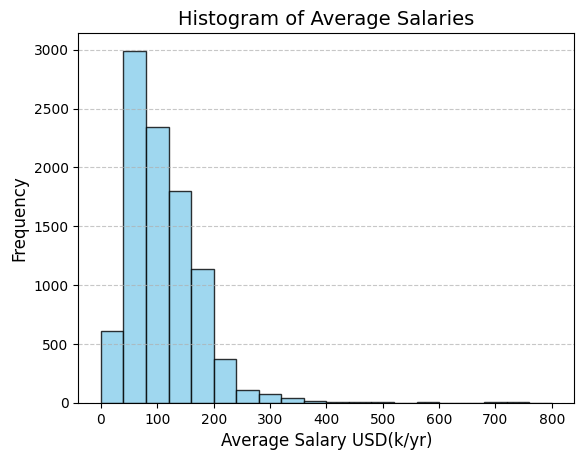

In [ ]:

'Part 13 - Finding Median Salary using Upper and Lower Range'

# Checking distribution of Mean salary to either calculate the mean or the median
mean_sal_filtered = merged_df['Mean Salary'][merged_df['Mean Salary'] < 2000]

plt.hist(mean_sal_filtered , bins=20, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Histogram of Average Salaries', fontsize=14)
plt.xlabel('Average Salary USD(k/yr)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Group by Industry and calculate the mean of Mean Salary
industry_median_salaries = merged_df.groupby('Industry')['Mean Salary'].median().reset_index()

# Rename columns for clarity
industry_median_salaries.columns = ['Industry', 'Median Salary (k USD)']

# Sort by Average Salary in descending order
industry_median_salaries = industry_median_salaries.sort_values(by='Median Salary (k USD)', ascending=False)
industry_median_salaries


In [ ]:
'Part 14 - Median Salary for Top 10 Companies'

# Find the top 10 companies posting jobs
top_companies = merged_df['Company Name'].value_counts().head(10).index

# Filter the DataFrame to include only those companies
top_companies_df = merged_df[merged_df['Company Name'].isin(top_companies)]

# Group by Company Name and calculate the median salary for each company
company_median_salaries = top_companies_df.groupby('Company Name')['Mean Salary'].median().reset_index()

# Sort the companies by average salary
company_median_salaries = company_median_salaries.sort_values(by='Mean Salary', ascending=False)
company_median_salaries.columns = ['Company Name', 'Median Salary USD(k/yr)']

# Display the result
company_median_salaries


,Company Name,Median Salary USD(k/yr)
5,PwC,182.1500
3,Deloitte,166.6000
0,Amazon,160.0500
4,Jobs via Dice,144.1000
2,CyberCoders,120.0000
6,The Job Network,114.7224
1,Class A Drivers,61.9000
9,Whole Foods Market,49.6080
8,Walmart,40.5600
7,Total Quality Logistics,7.5000


In [ ]:
'Part 15 - Creating an Interactive Map of United States with Median Salary For Each State'

# Group the data by state and calculate the mean salary for each state
state_median_salaries = merged_df.groupby('State')['Mean Salary'].median().reset_index()

# Sort the states by average salary in descending order to get the top states
state_median_salaries = state_median_salaries.sort_values(by='Mean Salary', ascending=False)
state_median_salaries.columns = ['State', 'Median Salary USD(k/yr)']

import pandas as pd

# Initial data
data = {
    "State": ["DC", "WA", "VA", "OR", "DE", "NC", "MA", "CT", "TX", "NM", "CA", "MD", "IA", "MO"],
    "Median Salary (k USD)": [135.0000, 120.0000, 115.3000, 114.6184, 109.5700, 107.5000, 106.2500, 106.2500, 105.0000, 105.0000, 104.9000, 104.5000, 100.0000, None]
}

# DataFrame
df = pd.DataFrame(data)

# Full state mapping
state_mapping = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming",
    "DC": "District of Columbia"
}





# Apply the function to create a new 'state' column
state_median_salaries['name'] = state_median_salaries['State'].map(state_mapping)
# Display the average salary by state
state_median_salaries


,State,Median Salary USD(k/yr),name
7,DC,135.0000,District of Columbia
47,WA,120.0000,Washington
45,VA,115.3000,Virginia
37,OR,114.6184,Oregon
8,DE,109.5700,Delaware
27,NC,107.5000,North Carolina
19,MA,106.2500,Massachusetts
6,CT,106.2500,Connecticut
43,TX,105.0000,Texas
32,NM,105.0000,New Mexico


In [ ]:
# Assuming job_counts is a DataFrame with job counts per state (created earlier)
# For demonstration, let's assume job_counts has columns ['State', 'Job Postings']

# Merge the job_counts DataFrame with the state_avg_salaries DataFrame on the 'State' column
merged_state_data = pd.merge(state_median_salaries, job_counts, on='State', how='left')


In [ ]:
state_median_salaries = merged_state_data

In [ ]:


# Load GeoJSON for US states
with open("/content/us-states.json") as f:
    us_states = json.load(f)

# Prepare mean salary dictionary for hover tooltips
sal_counts_dict = dict(zip(state_median_salaries['name_x'], state_median_salaries['Median Salary USD(k/yr)']))

# Add mean salary to GeoJSON properties
for feature in us_states['features']:
    state_name = feature['properties']['name']
    feature['properties']['median_salary'] = sal_counts_dict.get(state_name, 'No Data')

# Initialize the map
salary_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # Centered in the US

# Add Choropleth for full-state shading (visualizing mean salary)
folium.Choropleth(
    geo_data=us_states,
    name="choropleth",
    data=state_median_salaries,  # Use state_avg_salaries for mean salary data
    columns=["name_x", "Median Salary USD(k/yr)"],  # Columns for state names and mean salaries
    key_on="feature.properties.name",  # Match GeoJSON 'name' field
    fill_color="Greens",  # Color scheme for salary (you can choose another scheme)
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Median Salary by State USD(k/yr)",
).add_to(salary_map)

# Step 5: Add GeoJSON with tooltips displaying mean salary per state
folium.GeoJson(
    us_states,
    style_function=lambda feature: {
        'fillColor': 'transparent',
        'color': 'transparent',
        'weight': 0
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["name", "median_salary"],
        aliases=["State: ", "Median Salary USD(k/yr): "],
        localize=True,
        style=("background-color: white; color: black; font-size: 12px; padding: 5px;"),
        sticky=True,
        labels=True,
    )
).add_to(salary_map)

# Step 6: Save the map to an HTML file
salary_map.save('salary_map.html')

# Display the map (in Jupyter Notebook or similar)
salary_map


In [ ]:
merged_df

,Job Title,Company Name,Job Location,Salary Information,mode_of_work,Industry,State,Lower Range,Upper Range,Mean Salary
0,Enterprise Account Executive,Confluent,"Michigan, United States",$131.4K/yr - $154.4K/yr,Remote,Business,MI,131.400,154.400,142.9000
1,Professional Services Consultant - Networking/...,LogicalisUS,"Corona, CA",$130K/yr - $150K/yr,On-site,Tech,CA,130.000,150.000,140.0000
2,Executive Partner - CTO Advisory - Infrastruct...,Gartner,"Texas, United States",$164.8K/yr - $192K/yr · 401(k),Remote,Business,TX,164.800,192.000,178.4000
3,"Escalation Engineer (EM), Escalation & Event M...",Amazon Web Services (AWS),"Seattle, WA",$86K/yr - $185K/yr,On-site,Tech,WA,86.000,185.000,135.5000
4,Workday AMS Integrations Consultant,Deloitte,"St Louis, MO",$97.9K/yr - $163.1K/yr,Hybrid,Business,MO,97.900,163.100,130.5000
...,...,...,...,...,...,...,...,...,...,...
11789,Business Development Consultant,CHG Healthcare,"Fort Lauderdale, FL","$50,000 - $235,000 a year",On-site,Business,FL,50.000,235.000,142.5000
11790,MAST Data Reporting Analyst,Carnival Corporation,"Hybrid work in Miami, FL",None provided,On-site,Tech,FL,NaN,NaN,NaN
11791,Executive Assistant,Abitos PLLC,"Coral Gables, FL 33134",None provided,On-site,Business,FL,NaN,NaN,NaN
11792,Human Resources Business Partner- Employee Rel...,"Collier County, FL","Tamiami, FL","$71,676 - $78,843 a year",On-site,Business,FL,71.676,78.843,75.2595


In [ ]:
merged_df.rename(columns={"mode_of_work": "Mode of Work", "Lower Range": "Lower Salary Range USD(k/yr)", "Upper Range": "Upper Salary Range USD(k/yr)", "Mean Salary":"Mean Salary Range USD(k/yr)"}, inplace=True)


In [ ]:
merged_df

,Job Title,Company Name,Job Location,Salary Information,Mode of Work,Industry,State,Lower Salary Range USD(k/yr),Upper Salary Range USD(k/yr),Mean Salary Range USD(k/yr)
0,Enterprise Account Executive,Confluent,"Michigan, United States",$131.4K/yr - $154.4K/yr,Remote,Business,MI,131.400,154.400,142.9000
1,Professional Services Consultant - Networking/...,LogicalisUS,"Corona, CA",$130K/yr - $150K/yr,On-site,Tech,CA,130.000,150.000,140.0000
2,Executive Partner - CTO Advisory - Infrastruct...,Gartner,"Texas, United States",$164.8K/yr - $192K/yr · 401(k),Remote,Business,TX,164.800,192.000,178.4000
3,"Escalation Engineer (EM), Escalation & Event M...",Amazon Web Services (AWS),"Seattle, WA",$86K/yr - $185K/yr,On-site,Tech,WA,86.000,185.000,135.5000
4,Workday AMS Integrations Consultant,Deloitte,"St Louis, MO",$97.9K/yr - $163.1K/yr,Hybrid,Business,MO,97.900,163.100,130.5000
...,...,...,...,...,...,...,...,...,...,...
11789,Business Development Consultant,CHG Healthcare,"Fort Lauderdale, FL","$50,000 - $235,000 a year",On-site,Business,FL,50.000,235.000,142.5000
11790,MAST Data Reporting Analyst,Carnival Corporation,"Hybrid work in Miami, FL",None provided,On-site,Tech,FL,NaN,NaN,NaN
11791,Executive Assistant,Abitos PLLC,"Coral Gables, FL 33134",None provided,On-site,Business,FL,NaN,NaN,NaN
11792,Human Resources Business Partner- Employee Rel...,"Collier County, FL","Tamiami, FL","$71,676 - $78,843 a year",On-site,Business,FL,71.676,78.843,75.2595
